In [43]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.animation as animation

# Pendulo Amortecido

$  \frac{d^2 \theta (t)}{dt^2} + b \frac{d \theta}{dt}(t) + \frac{g}{l} \sin(\theta(t)) = 0$

$ \frac{d \theta}{dt} = \omega$


$ \frac{d \omega}{dt}(t) + b \omega (t) + c \sin(\theta(t)) = 0$

## Solução por integração numérica da equação diferencial

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [44]:
# Equ differencial y[0] = theta , y[1] = omega
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [45]:
#constante de amortecimento:
b = 0.25
G = 9.8  # acceleration due to gravity, in m/s^2
L = 1.3  # length of pendulum in m
#initial conditions, phase, angular speed
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

In [46]:
sol = odeint(pend, y0, t, args=(b, G/L))

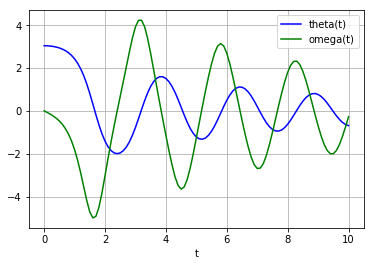

In [47]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

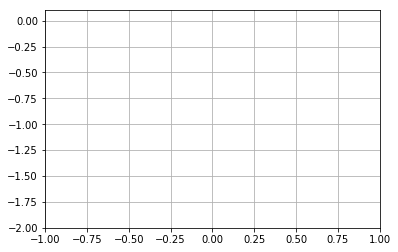

In [48]:
x1 = L*np.sin(sol[:, 0])
y1 = -L*np.cos(sol[:, 0])

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i]]
    thisy = [0, y1[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=25, blit=True, init_func=init)

# ani.save('simple_pendulum.mp4', fps=15)
plt.show()

## Tempo de Reação

In [49]:
distQueda=np.array([0.10, 0.10, 0.09, 0.09, 0.08])
distQuedaMed=np.average(distQueda)
distQuedaDesvPad=np.std(distQueda, ddof=1)
#
g=9.80
tReac=np.sqrt(2*distQuedaMed / g) 
tReacDesvPad = tReac/2/distQuedaMed * distQuedaDesvPad



In [50]:
arr=np.genfromtxt('Files/pendulo.txt')

In [51]:
time=arr[:,1]*1e-3
period=arr[:,3]*1e-6
vel=0.02/(arr[:,5]*1e-6)

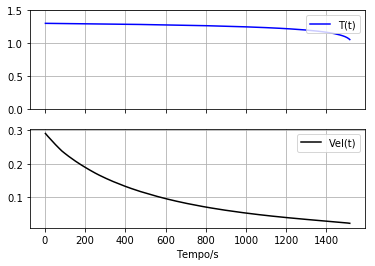

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(211, autoscale_on=False, xlim=(0, 1500), ylim=(0, 1.5))
ax2 = fig.add_subplot(212, sharex=ax1) #, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))


#ax1.plot(theta, y,label='Emitido-CH1')
ax1.plot(time,period, 'b', label='T(t)')
ax1.grid()
ax1.legend(loc='upper right')
ax2.plot(time,vel, 'k', label='Vel(t)')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)
ax2.legend(loc='best')
ax2.set_xlabel('Tempo/s')
ax2.grid()
plt.show()
#arr

Ajuste   $\Large{f(x) = a e^{-bx} + c}$

In [53]:
def f(x, a, b, c):
    return a*np.exp(-b*x)+c

In [54]:
guess = [3.0, 1.0e-3, 0.1]
popt, pcov = curve_fit(f, time, vel, p0=guess)
#The optimised parameters of the fit
print "popt:", popt
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print "perr:", perr
#The covariance matrix of the parameters
print "pcov:", pcov

popt: [ 0.26660063  0.00201029  0.01420931]
perr: [  4.20749876e-04   9.73253056e-06   3.92453719e-04]
pcov: [[  1.77030458e-07  -3.73081758e-10  -6.82977705e-08]
 [ -3.73081758e-10   9.47221510e-11   3.44687312e-09]
 [ -6.82977705e-08   3.44687312e-09   1.54019921e-07]]


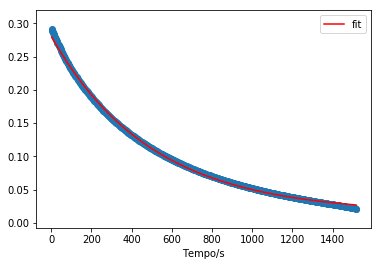

In [57]:
plt.scatter(time, vel)
#strlabel = r'$R^2 = %0.3f$' % Rsq
plt.plot(time, f(time, *popt), color='red', label='fit')
plt.legend()
plt.xlabel('Tempo/s')
plt.show()

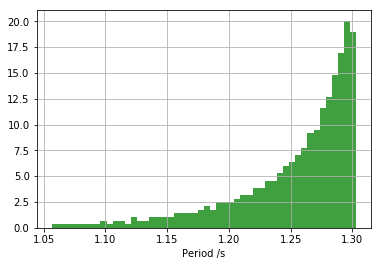

In [63]:
# the histogram of the data
n, bins, patches = plt.hist(period, bins=50, normed='True', facecolor='green', alpha=0.75)
plt.grid(True)
plt.xlabel('Period /s')
#plt.ylabel('Probability')

plt.show()